In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Olympiako'
raceDate = '19-05-2024'
surface = 'Gravel'
competition = 'Greek Championship'

link = 'https://www.ewrc-results.com/results/88891-olympiako-rally-2024/?s='
startat, no_ss=461256, int(6)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []
overall_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data1 = pd.read_html(page_html11)[1]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data1.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','total_time', 'Diff', 'Speed']
    data['ss']=ss+1
    data1['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    equal = '=' in data1['Pos.'].unique()
    if equal:
        data1['Pos.'] = data1['Pos.'].replace('=', method='ffill')
        data1['Pos.'] = data1['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data1)
    rally_23.append(data) 
    overall_23.append(data1)

C:\Users\ilias\AppData\Local\Temp\ipykernel_31420\3609136228.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_31420\3609136228.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')


In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally_overall = pd.concat(overall_23, axis=0)
rally_overall.tail(50)

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss
19,20.,#39,Giokaris S. - Mourtzoukos G. Toyota Starlet EP91,C6 F2,1:05:28.06,+8:43.21 +49.25,59.8 8.02,5
20,21. +2,#31,Giannakopoulos I. - Foteinogiannopoulos I. Fo...,C5 F2,1:05:33.30 0:05,+8:48.45 +5.24,59.8 8.10,5
21,22. +2,#37,Anastassopoulos A. - Paraskevopoulos A. Toyot...,C4 F2 E,1:05:36.80,+8:51.95 +3.50,59.7 8.15,5
22,23. −2,#34,Chatzigakis Giorgos - Tolias I. Ford Escort MK2,C3 F2 E,1:05:58.99,+9:14.14 +22.19,59.3 8.49,5
23,24. +3,#48,Tsagarakis A. - Koufolias E. BMW E21,C3 F2 E,1:07:07.07,+10:22.22 +1:08.08,58.3 9.54,5
24,25. +1,#43,Pateas A. - Panagopoulos V. Toyota Starlet EP91,C6 F2,1:07:44.09,+10:59.24 +37.02,57.8 10.1,5
25,26. +2,#35,Bris Panagiotis - Mikelopoulos G. Ford Escort...,C3 F2 E,1:07:47.65,+11:02.80 +3.56,57.7 10.2,5
26,27. +5,#32,Mourikis A. - Karastefanou S. Renault Clio RS...,C3 F2,1:10:50.79,+14:05.94 +3:03.14,55.3 13.0,5
27,28. +3,#49,Katevas D. - Apostolopoulos S. Toyota Yaris,C6 F2,1:10:51.00,+14:06.15 +0.21,55.2 13.0,5
28,29. +4,#46,Vassilopoulos P. - Votzakis P. Ford Escort MK1,2,1:11:36.60,+14:51.75 +45.60,54.7 13.7,5


In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally_overall['Pos.'] = rally_overall['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:2]
rally_overall['Race'] = rallyname
rally_overall['date'] = raceDate
rally_overall['surface'] = surface
rally_overall['competition'] = competition
rally_overall['Crew'] = rally2023_stages['Crew'].str[:14]
rally_overall['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:2]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally_overall['cPos']= rally_overall.groupby(['Race', 'ss']).cumcount()+1
rally_overall[['Stages_time', 'Penalty']] = rally_overall['total_time'].str.split(' ', expand=True)
rally_overall['Stages_t_s'], rally_overall['Stages_t_m'], rally_overall['Stages_t_h']= rally_overall['Stages_time'].str[-5:], rally_overall['Stages_time'].str[-8:-6].astype(int), rally_overall['Stages_time'].str[:-9]
rally_overall['Penalty_m'], rally_overall['Penalty_s'] = rally_overall['Penalty'].str[:-3], rally_overall['Penalty'].str[-2:]
rally_overall[['Diff_1st', 'Diff_Pre']] = rally_overall['Diff'].str.split(' +', expand=True)
rally_overall['Diff_1st'] = rally_overall['Diff_1st'].str.replace('+', '')
rally_overall = rally_overall.replace('',0)
rally_overall.fillna(0, inplace=True)
cols = ['Stages_t_h', 'Stages_t_m', 'Stages_t_s', 'Penalty_m', 'Penalty_s']
rally_overall[cols] = rally_overall[cols].apply(pd.to_numeric, errors='coerce', axis=1)
rally_overall['time'] = rally_overall['Stages_t_s'] +  rally_overall['Stages_t_m'] *60 + rally_overall['Stages_t_h'] *3600
#rally_overall.to_csv('trialData.csv', index=False)
rally_overall

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss,Race,date,...,Stages_time,Penalty,Stages_t_s,Stages_t_m,Stages_t_h,Penalty_m,Penalty_s,Diff_1st,Diff_Pre,time
0,1.0,#2,Papadimitriou,C1,10:28.66,0,71.6,1,Olympiako,19-05-2024,...,10:28.66,0,28.66,10.0,0.0,0.0,0.0,0,0,628.66
1,2.0,#9,Amoutzas G. -,C2,10:38.13,+9.47 +9.47,70.5 0.76,1,Olympiako,19-05-2024,...,10:38.13,0,38.13,10.0,0.0,0.0,0.0,9.47,+9.47,638.13
2,3.0,#1,Tsolakidis Soc,C1,10:41.45,+12.79 +3.32,70.2 1.02,1,Olympiako,19-05-2024,...,10:41.45,0,41.45,10.0,0.0,0.0,0.0,12.79,+3.32,641.45
3,4.0,#5,Karanikolas E.,C2,10:43.02,+14.36 +1.57,70.0 1.15,1,Olympiako,19-05-2024,...,10:43.02,0,43.02,10.0,0.0,0.0,0.0,14.36,+1.57,643.02
4,5.0,#6,Panteli Petros,C2,10:45.79,+17.13 +2.77,69.7 1.37,1,Olympiako,19-05-2024,...,10:45.79,0,45.79,10.0,0.0,0.0,0.0,17.13,+2.77,645.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29. +2,#41,Mourikis A. -,C3,1:26:25.95 0:10,+18:39.69 +15.09,55.3 14.1,6,Olympiako,19-05-2024,...,1:26:25.95,0:10,25.95,26.0,1.0,0.0,10.0,18:39.69,+15.09,5185.95
29,30. +3,#51,Dimakopoulos K,C4,1:27:37.52 0:20,+19:51.26 +1:11.57,54.6 15.0,6,Olympiako,19-05-2024,...,1:27:37.52,0:20,37.52,27.0,1.0,0.0,20.0,19:51.26,+1:11.57,5257.52
30,31. +3,#47,Katevas D. -,C6,1:28:50.46,+21:04.20 +1:12.94,53.7 15.9,6,Olympiako,19-05-2024,...,1:28:50.46,0,50.46,28.0,1.0,0.0,0.0,21:04.20,+1:12.94,5330.46
31,32. +3,#44,Tzilavis Savva,2,1:28:57.98 0:20,+21:11.72 +7.52,53.8 16.0,6,Olympiako,19-05-2024,...,1:28:57.98,0:20,57.98,28.0,1.0,0.0,20.0,21:11.72,+7.52,5337.98


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")

In [7]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv( str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Papadimitriou,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,1,628.66
1,Amoutzas G. -,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,2,638.13
2,Tsolakidis Soc,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,3,641.45
3,Karanikolas E.,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,4,643.02
4,Panteli Petros,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,5,645.79
...,...,...,...,...,...,...,...,...,...
28,Mourikis A. -,C3,6,Olympiako,19-05-2024,Gravel,Greek Championship,29,858.98
29,Dimakopoulos K,C4,6,Olympiako,19-05-2024,Gravel,Greek Championship,30,860.94
30,Katevas D. -,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,31,889.88
31,Tzilavis Savva,2,6,Olympiako,19-05-2024,Gravel,Greek Championship,32,912.86


In [8]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race      ss Gr/Cl             
Olympiako 1  2           777.35
             4           687.95
             C1          628.66
             C2          638.13
             C3          728.28
             C4          690.64
             C5          676.97
             C6          733.06
          2  2           934.01
             4           803.11
             C1          707.82
             C2          722.31
             C3          816.80
             C4          784.63
             C5          760.90
             C6          831.63
          3  2           843.32
             4           759.15
             C1          694.70
             C2          680.43
             C3          783.92
             C4          728.69
             C5          705.93
             C6          774.53
          4  2           796.16
             C1          632.31
             C2          631.78
             C3          721.93
             C4          694.29
             C5          664.64
             C6          734.68
          5  2           939.74
             C1          712.45
             C2          713.89
             C3          853.11
             C4          796.36
             C5          768.28
             C6          847.46
          6  2           843.61
             C1          684.96
             C2          660.09
             C3          780.80
             C4          727.37
             C5          709.14
             C6          789.43

In [9]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Papadimitriou,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,1,628.66,628.66,628.66,0.00,0.00,0.000000,01
1,Tsolakidis Soc,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,3,641.45,628.66,628.66,12.79,12.79,2.034486,01
2,Rendina Max -,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,7,649.50,628.66,628.66,20.84,20.84,3.314987,01
3,Philippedes Yo,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,8,651.94,628.66,628.66,23.28,23.28,3.703115,01
4,Amoutzas G. -,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,2,638.13,638.13,628.66,9.47,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Pateas A. - P,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,24,810.40,789.43,660.09,150.31,20.97,2.656347,06
244,Sotiropoulos N,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,26,840.40,789.43,660.09,180.31,50.97,6.456557,06
245,Katevas D. -,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,31,889.88,789.43,660.09,229.79,100.45,12.724371,06
246,Vassilopoulos,2,6,Olympiako,19-05-2024,Gravel,Greek Championship,27,843.61,843.61,660.09,183.52,0.00,0.000000,06


In [10]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2a.csv')

In [11]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06
Crew,,,,,,
Amoutzas G. -,0.00,6.05,2.06,0.00,10.20,5.54
Anastassopoulo,36.23,47.08,92.69,32.79,33.40,45.59
Angelopoulos A,19.30,35.19,21.83,18.50,3.93,0.00
Athanassopoulo,8.48,21.09,47.48,15.98,NaN,NaN
Bris Panagioti,31.71,55.26,31.67,18.24,26.73,28.54
Chatzigakis Gi,7.78,22.17,0.00,0.00,25.00,44.81
Chatzimarkos P,14.16,0.00,14.65,12.50,0.00,NaN
Davaris Nikos,82.57,122.40,89.77,91.60,105.93,121.16
Delaportas Gio,45.55,61.01,101.19,53.55,67.09,53.42


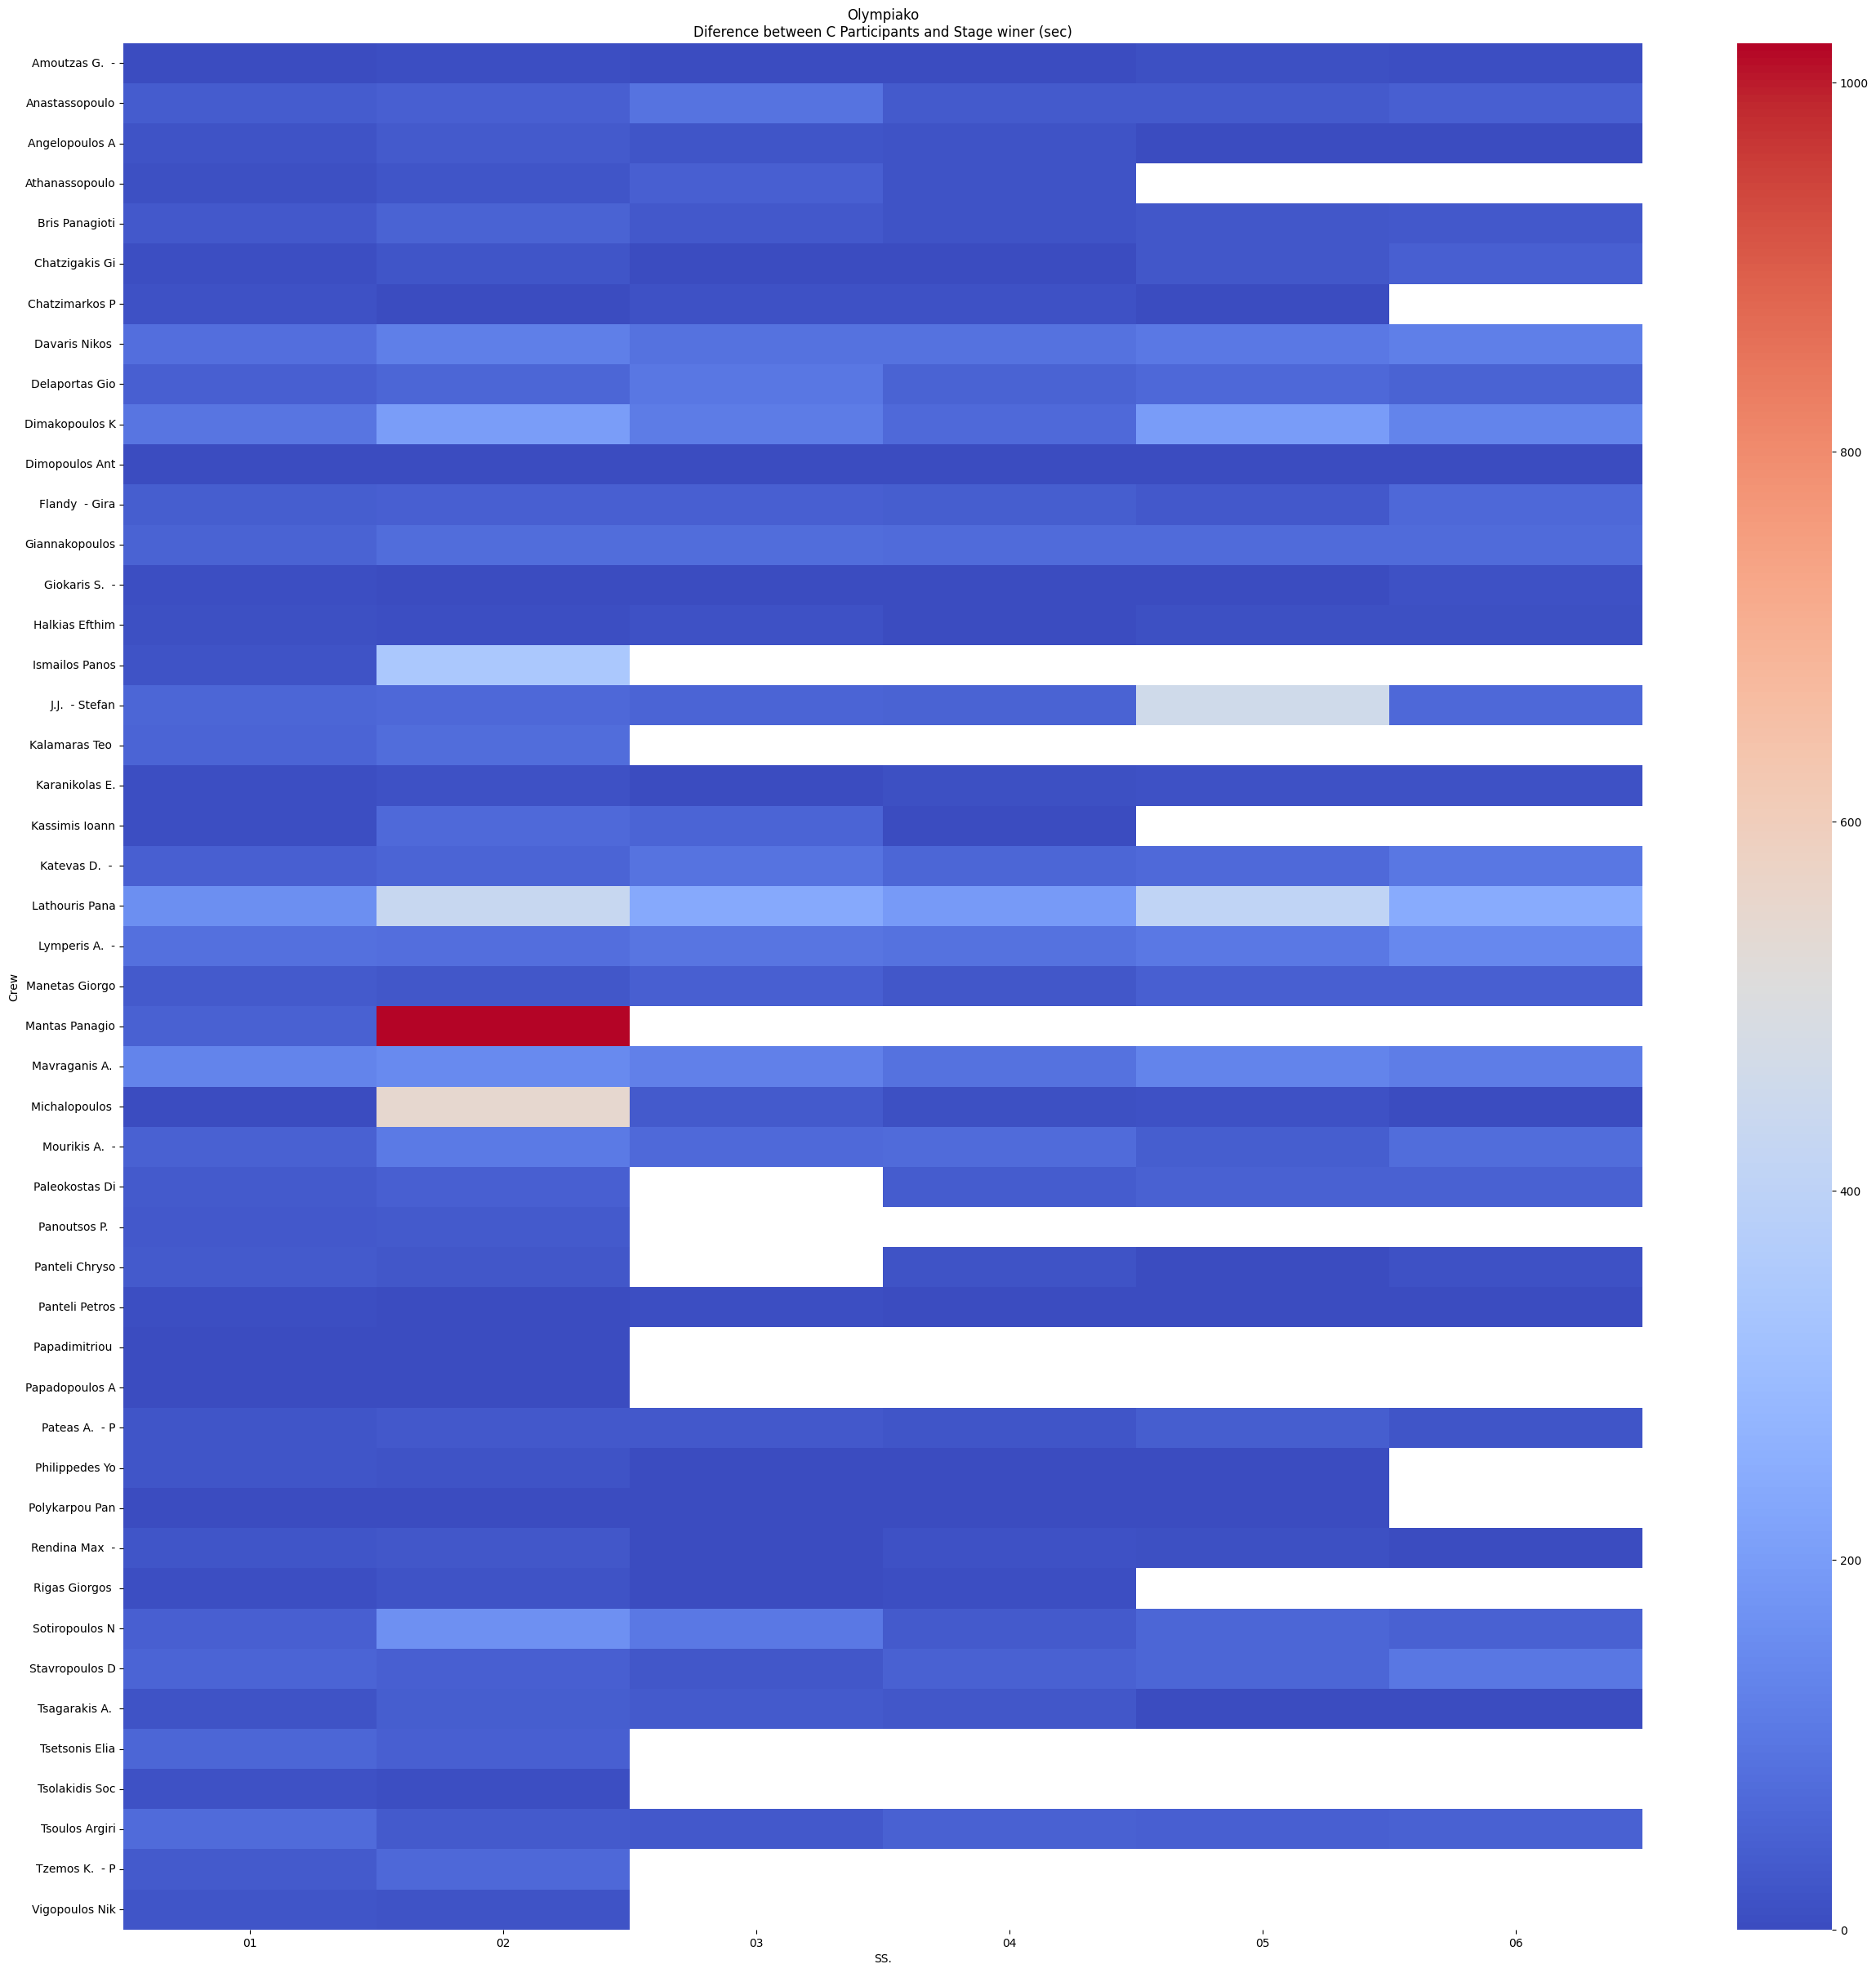

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.show()

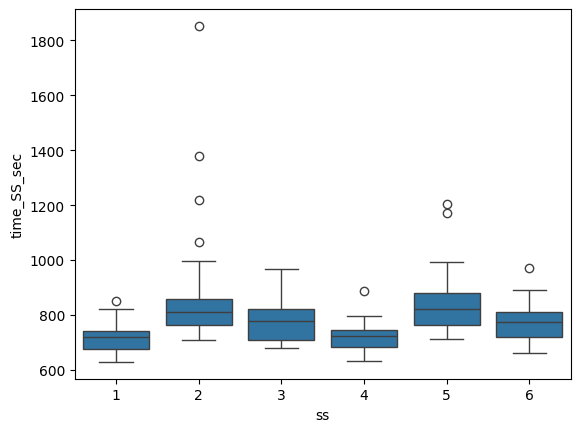

In [13]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + rallyname + Group + ".png")

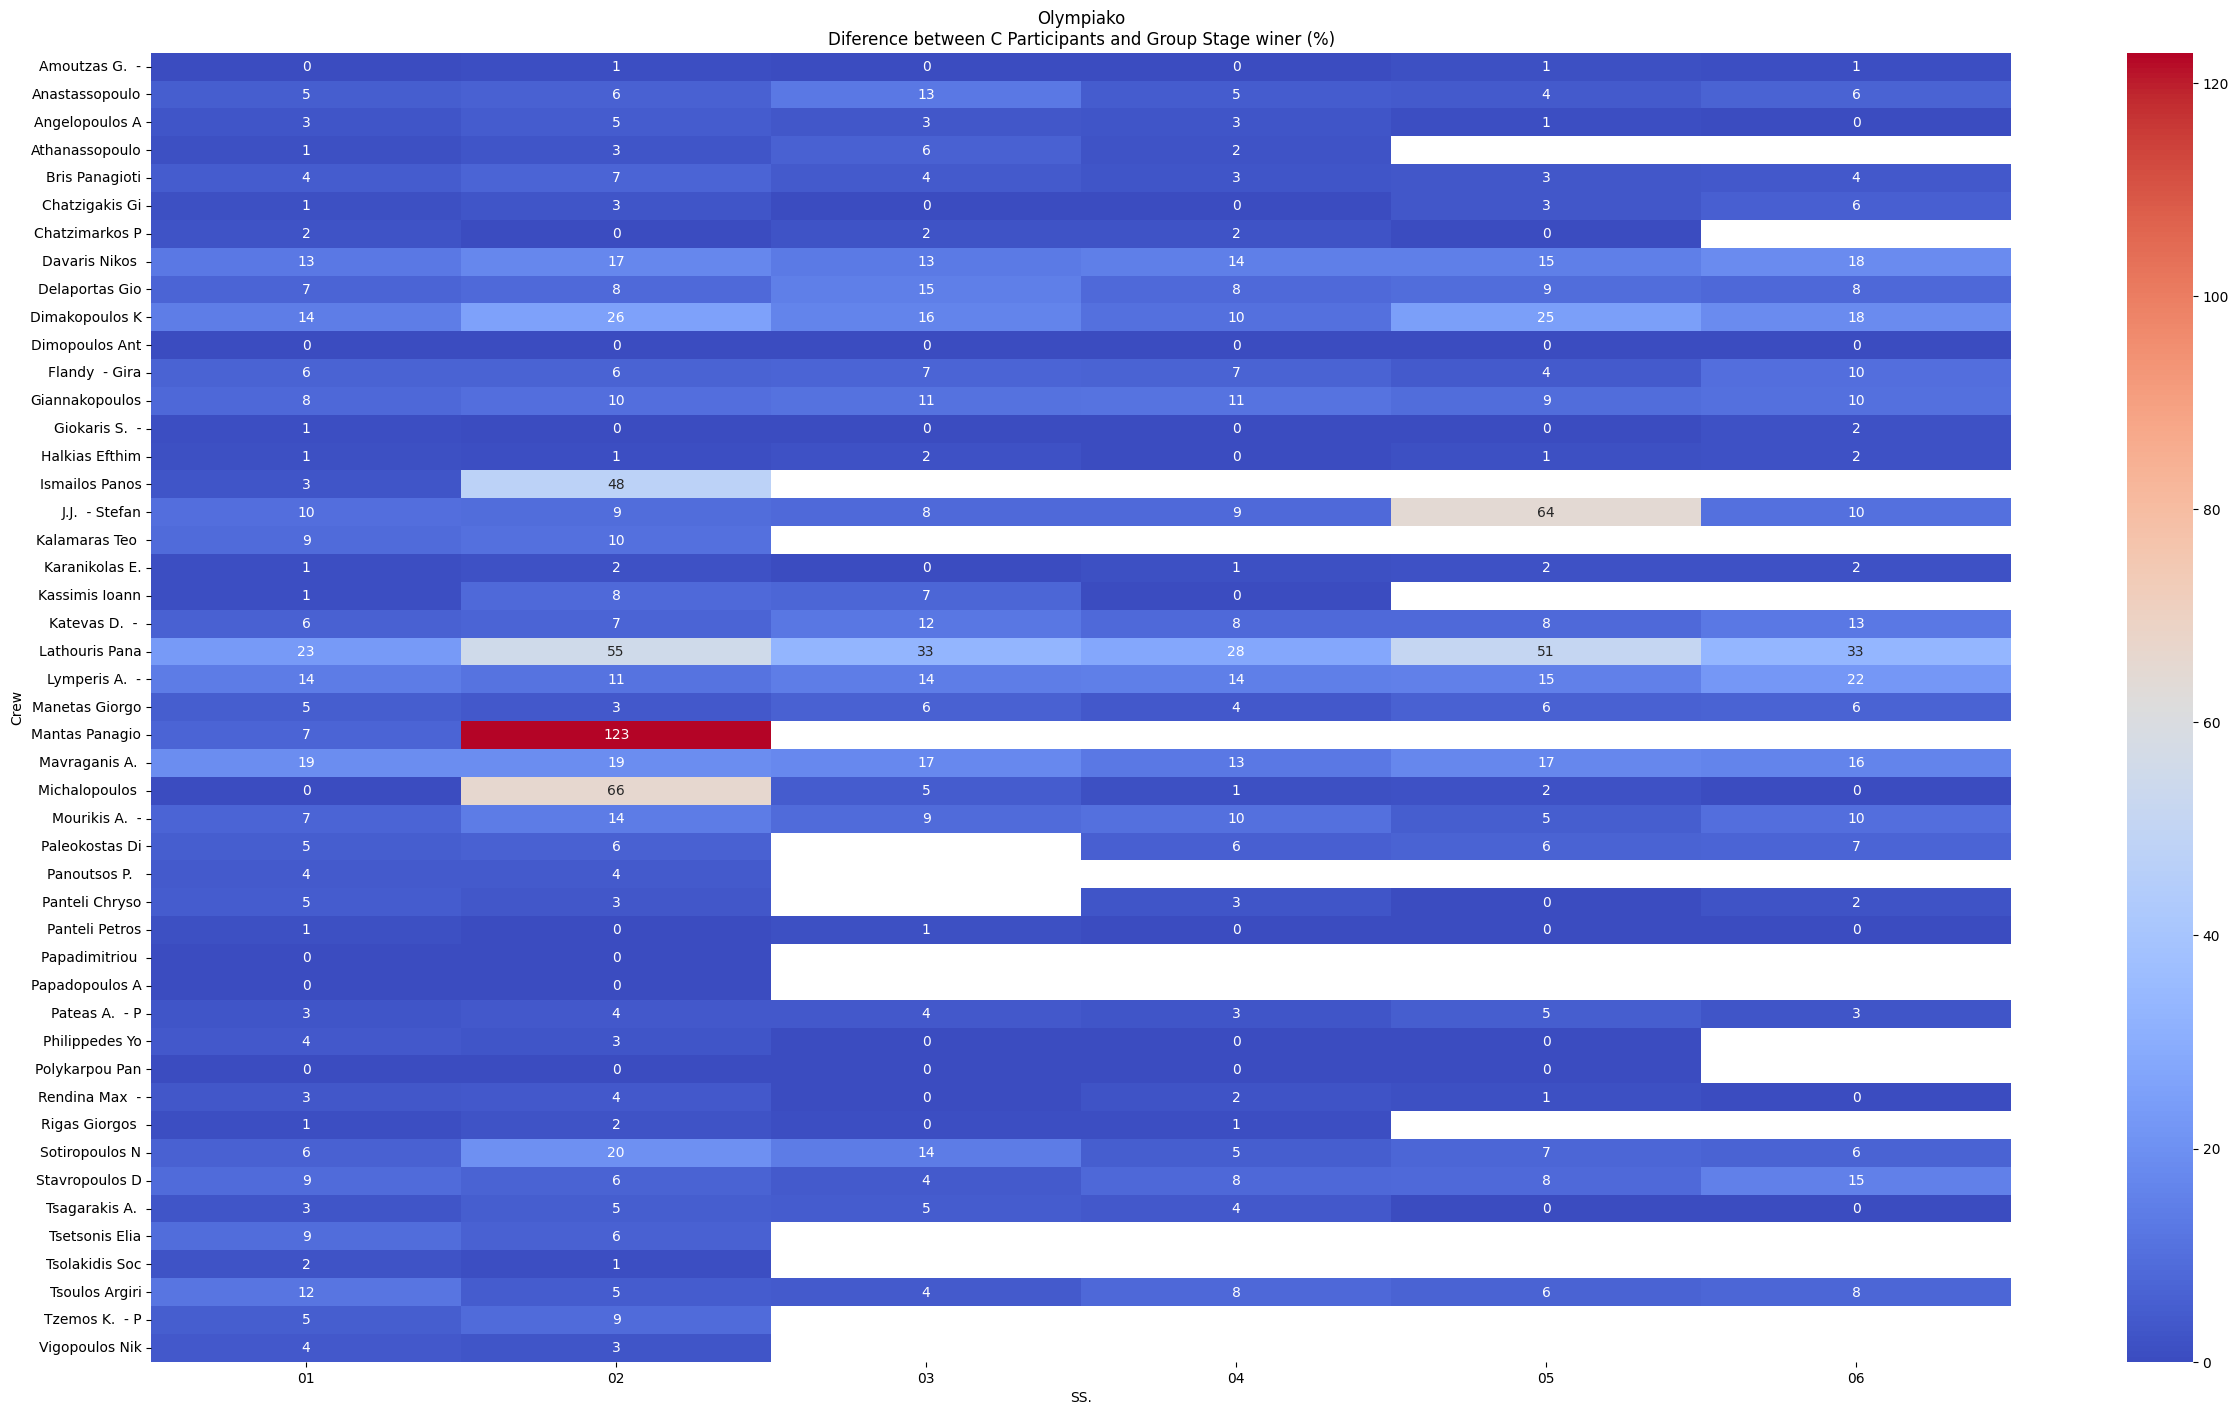

In [14]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".png")
plt.show()

In [15]:
ss_times_FIXED = ss_times_WRC.drop(ss_times_WRC[ss_times_WRC['time_SS_sec']>=1.2*ss_times_WRC['min_time_Gr']].index)
ss_times_FIXED
#ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Papadimitriou,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,1,628.66,628.66,628.66,0.00,0.00,0.000000,01
1,Tsolakidis Soc,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,3,641.45,628.66,628.66,12.79,12.79,2.034486,01
2,Rendina Max -,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,7,649.50,628.66,628.66,20.84,20.84,3.314987,01
3,Philippedes Yo,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,8,651.94,628.66,628.66,23.28,23.28,3.703115,01
4,Amoutzas G. -,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,2,638.13,638.13,628.66,9.47,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Michalopoulos,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,20,789.43,789.43,660.09,129.34,0.00,0.000000,06
242,Giokaris S. -,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,21,802.01,789.43,660.09,141.92,12.58,1.593555,06
243,Pateas A. - P,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,24,810.40,789.43,660.09,150.31,20.97,2.656347,06
244,Sotiropoulos N,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,26,840.40,789.43,660.09,180.31,50.97,6.456557,06


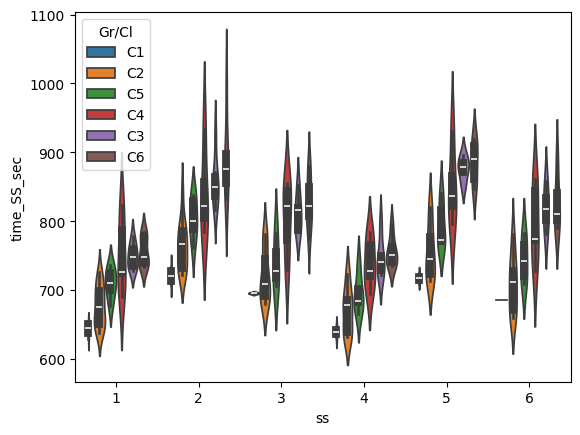

In [16]:
sns.violinplot(y=ss_times_FIXED['time_SS_sec'], x=ss_times_FIXED['ss'],hue=ss_times_FIXED['Gr/Cl'])
plt.savefig(rallyname + '_violinplot.png')

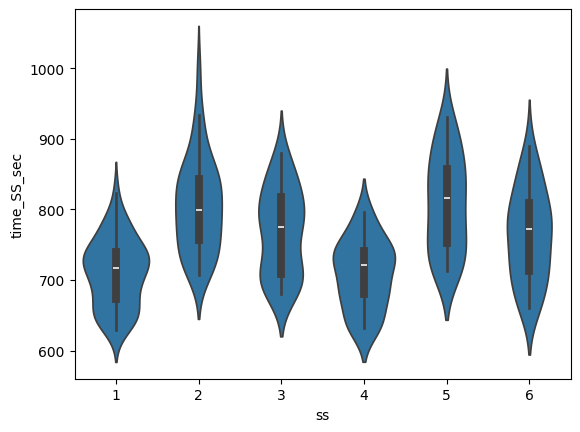

In [17]:
#sns.boxplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
sns.violinplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
plt.savefig(rallyname + '_violinplot_FIXED.png')

In [18]:
Thiva = ss_times_FIXED[(ss_times_FIXED["ss"] % 2 ==1) & (ss_times_FIXED["ss"] < 5)]
Elikonas = ss_times_FIXED[ss_times_FIXED["ss"] % 2 == 0]
Moschopodi = ss_times_FIXED[ss_times_FIXED["ss"] == 5]

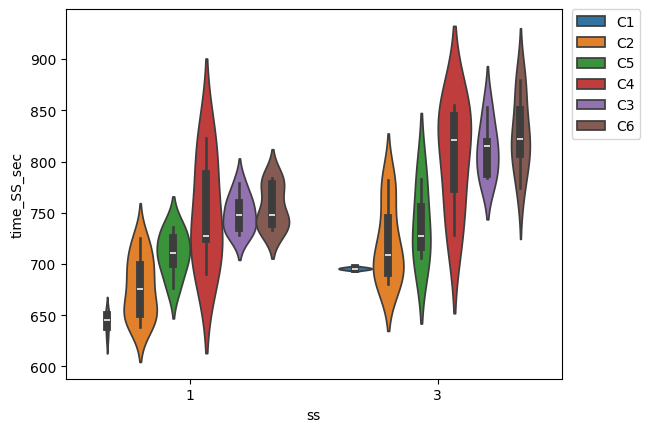

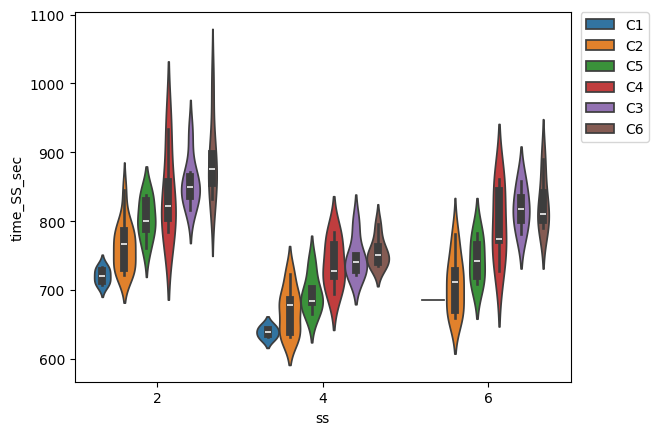

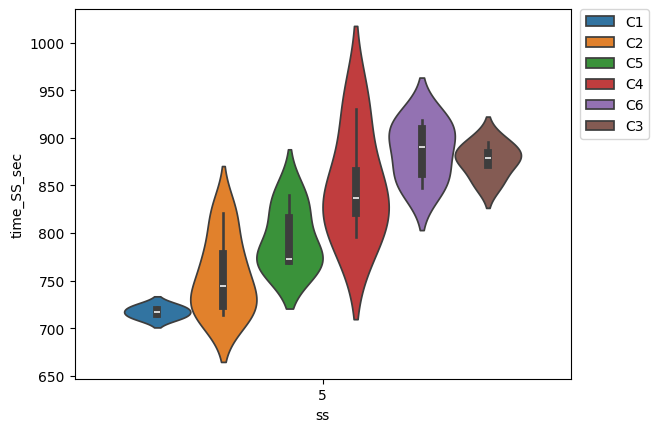

In [19]:
fig.set_size_inches(20,15)
sns.violinplot( y=Thiva["time_SS_sec"], x=Thiva["ss"], hue = Thiva["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Thiva_violinplot.png')
plt.show()
fig.set_size_inches(30,20)
sns.violinplot( y=Elikonas["time_SS_sec"], x=Elikonas["ss"], hue = Elikonas["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Elikonas_violinnplot.png')
plt.show()
fig.set_size_inches(30,25)
sns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Moschopodi_violinnplot.png')

In [20]:
Group = 'C1 - C2'
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6.to_csv(str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv('test2a.csv')

In [21]:
ss_times_C6_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_C6_F4 = pd.pivot_table(ss_times_C6_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_C6_F4

SS.,01,02,03,04,05,06
Crew,,,,,,
Amoutzas G. -,0.00,6.05,2.06,0.00,10.20,5.54
Chatzimarkos P,14.16,0.00,14.65,12.50,0.00,NaN
Davaris Nikos,82.57,122.40,89.77,91.60,105.93,121.16
Delaportas Gio,45.55,61.01,101.19,53.55,67.09,53.42
Flandy - Gira,41.11,45.91,46.18,42.38,30.65,65.54
Halkias Efthim,8.76,4.02,12.23,0.96,9.48,11.44
Ismailos Panos,17.77,343.89,NaN,NaN,NaN,NaN
J.J. - Stefan,62.39,67.77,55.91,53.95,459.21,67.56
Karanikolas E.,4.89,12.80,0.00,8.70,12.95,12.06


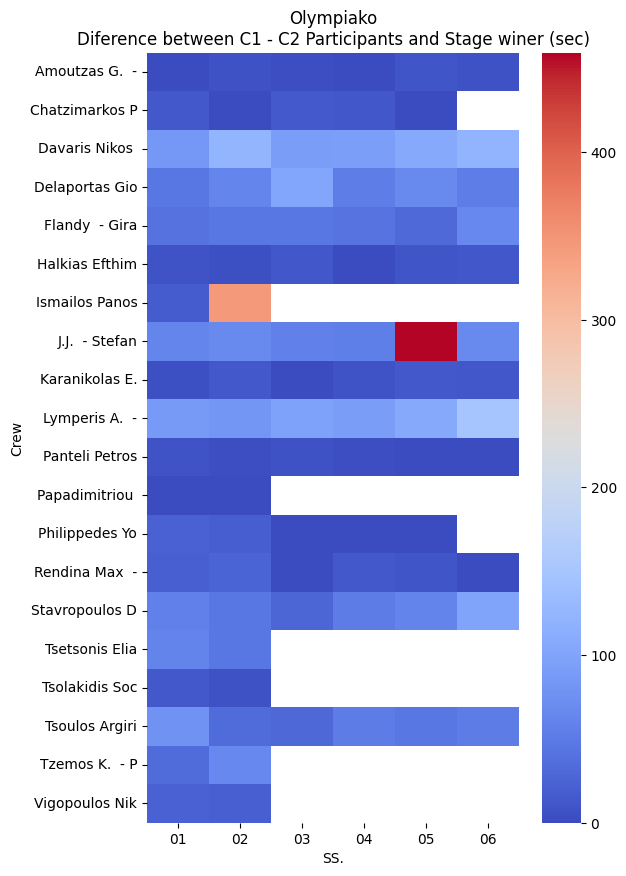

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(6,10)
Heatmap_ALL = sns.heatmap(ss_times_C6_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

In [23]:
min_value_overall = rally_overall.groupby(['Race', 'ss'])['time'].min()
min_value_overall_G = rally_overall.groupby(['Race', 'ss', 'Gr/Cl'])['time'].min()
#min_value = pd.DataFrame(min_value)

min_value_overall_2 =  pd.DataFrame(min_value_overall)
min_value_overall_2_G =  pd.DataFrame(min_value_overall_G)

min_value_overall_2_G = min_value_overall_2_G.rename(columns={'time' : 'min_time_Gr'})
min_value_overall_2 = min_value_overall_2.rename(columns={'time' : 'min_time'})
min_value_overall_2_G

min_time_Gr
Race      ss Gr/Cl             
Olympiako 1  2           778.74
             4           695.36
             C1          628.66
             C2          638.13
             C3          734.52
             C4          695.64
             C5          679.24
             C6          736.06
          2  2          1756.35
             4          1528.99
             C1         1336.48
             C2         1366.49
             C3         1565.41
             C4         1480.27
             C5         1458.90
             C6         1568.58
          3  2          2558.90
             4          2306.16
             C1         2069.68
             C2         2048.98
             C3         2373.04
             C4         2248.62
             C5         2170.91
             C6         2345.92
          4  2          3435.75
             C1         2692.28
             C2         2680.76
             C3         3058.99
             C4         3005.35
             C5         2848.23
             C6         3107.04
          5  2          4385.77
             C1         3404.85
             C2         3406.17
             C3         3958.99
             C4         3717.80
             C5         3627.21
             C6         3936.80
          6  2          5140.88
             C1         4136.99
             C2         4066.26
             C3         4709.76
             C4         4426.98
             C5         4318.40
             C6         4784.60

In [24]:
ss_times_F_G_overall = rally_overall.merge(min_value_overall_2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F_overall = ss_times_F_G_overall.merge(min_value2, on=['Race', 'ss'])
ss_times_F_overall['diff']=ss_times_F_overall['time'] - ss_times_F_overall['min_time']
ss_times_F_overall['diff_G']=ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr']
ss_times_F_overall['diff_G%']=(ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr'])/ss_times_F_overall['min_time_Gr']*100
ss_times_F_overall['SS.']=ss_times_F_overall['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F_overall

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss,Race,date,...,Penalty_s,Diff_1st,Diff_Pre,time,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,1.0,#2,Papadimitriou,C1,10:28.66,0,71.6,1,Olympiako,19-05-2024,...,0.0,0,0,628.66,628.66,628.66,0.00,0.00,0.000000,01
1,3.0,#1,Tsolakidis Soc,C1,10:41.45,+12.79 +3.32,70.2 1.02,1,Olympiako,19-05-2024,...,0.0,12.79,+3.32,641.45,628.66,628.66,12.79,12.79,2.034486,01
2,7.0,#8,Rendina Max -,C1,10:52.29,+23.63 +5.40,69.0 1.89,1,Olympiako,19-05-2024,...,0.0,23.63,+5.40,652.29,628.66,628.66,23.63,23.63,3.758789,01
3,8.0,#4,Philippedes Yo,C1,10:54.50 0:05,+25.84 +2.21,69.3 2.07,1,Olympiako,19-05-2024,...,5.0,25.84,+2.21,654.50,628.66,628.66,25.84,25.84,4.110330,01
4,2.0,#9,Amoutzas G. -,C2,10:38.13,+9.47 +9.47,70.5 0.76,1,Olympiako,19-05-2024,...,0.0,9.47,+9.47,638.13,638.13,628.66,9.47,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,24. +3,#32,Pateas A. - P,C6,1:25:09.77,+17:23.51 +3:52.78,56.0 13.1,6,Olympiako,19-05-2024,...,0.0,17:23.51,+3:52.78,5109.77,4784.60,660.09,4449.68,325.17,6.796179,06
244,26. +3,#46,Sotiropoulos N,C6,1:25:40.21,+17:53.95 +26.79,55.7 13.5,6,Olympiako,19-05-2024,...,0.0,17:53.95,+26.79,5140.21,4784.60,660.09,4480.12,355.61,7.432387,06
245,31. +3,#47,Katevas D. -,C6,1:28:50.46,+21:04.20 +1:12.94,53.7 15.9,6,Olympiako,19-05-2024,...,0.0,21:04.20,+1:12.94,5330.46,4784.60,660.09,4670.37,545.86,11.408686,06
246,27. +1,#49,Vassilopoulos,2,1:25:40.88,+17:54.62 +0.67,55.7 13.5,6,Olympiako,19-05-2024,...,0.0,17:54.62,+0.67,5140.88,5140.88,660.09,4480.79,0.00,0.000000,06


In [25]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_combine = ss_times_F_overall[ss_times_F_overall['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
ss_times_combine.to_csv(str(rallyname) + str(Group) + '_classification.csv')
ss_times_combine.columns

Index(['Pos.', 'No', 'Crew', 'Gr/Cl', 'total_time', 'Diff', 'Speed', 'ss',
       'Race', 'date', 'surface', 'competition', 'cPos', 'Stages_time',
       'Penalty', 'Stages_t_s', 'Stages_t_m', 'Stages_t_h', 'Penalty_m',
       'Penalty_s', 'Diff_1st', 'Diff_Pre', 'time', 'min_time_Gr', 'min_time',
       'diff', 'diff_G', 'diff_G%', 'SS.'],
      dtype='object')

In [26]:
ss_times_F3_overall =ss_times_combine.drop(['Gr/Cl','time','cPos', 'ss'], axis=1)
ss_times_F4_group = pd.pivot_table(ss_times_F3_overall, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4_overall = pd.pivot_table(ss_times_F3_overall, values='diff', index='Crew', columns=['SS.'])
ss_times_F4_overall

SS.,01,02,03,04,05,06
Crew,,,,,,
Amoutzas G. -,9.47,670.31,1377.97,2048.98,2739.58,3410.39
Anastassopoulo,105.49,863.44,1789.29,2453.12,3166.36,3997.80
Angelopoulos A,70.00,810.62,1539.69,2271.48,2965.42,3658.31
Athanassopoulo,124.94,924.23,1846.51,2580.89,NaN,NaN
Bris Panagioti,149.69,970.52,1743.92,2542.18,3355.20,4216.90
Chatzigakis Gi,112.88,886.44,1692.61,2427.21,3351.64,4453.33
Chatzimarkos P,27.24,658.67,1404.20,2098.37,2709.54,NaN
Davaris Nikos,96.95,897.32,1628.58,2449.10,3137.96,4056.05
Delaportas Gio,64.29,761.75,1675.90,2302.17,3002.48,3724.52


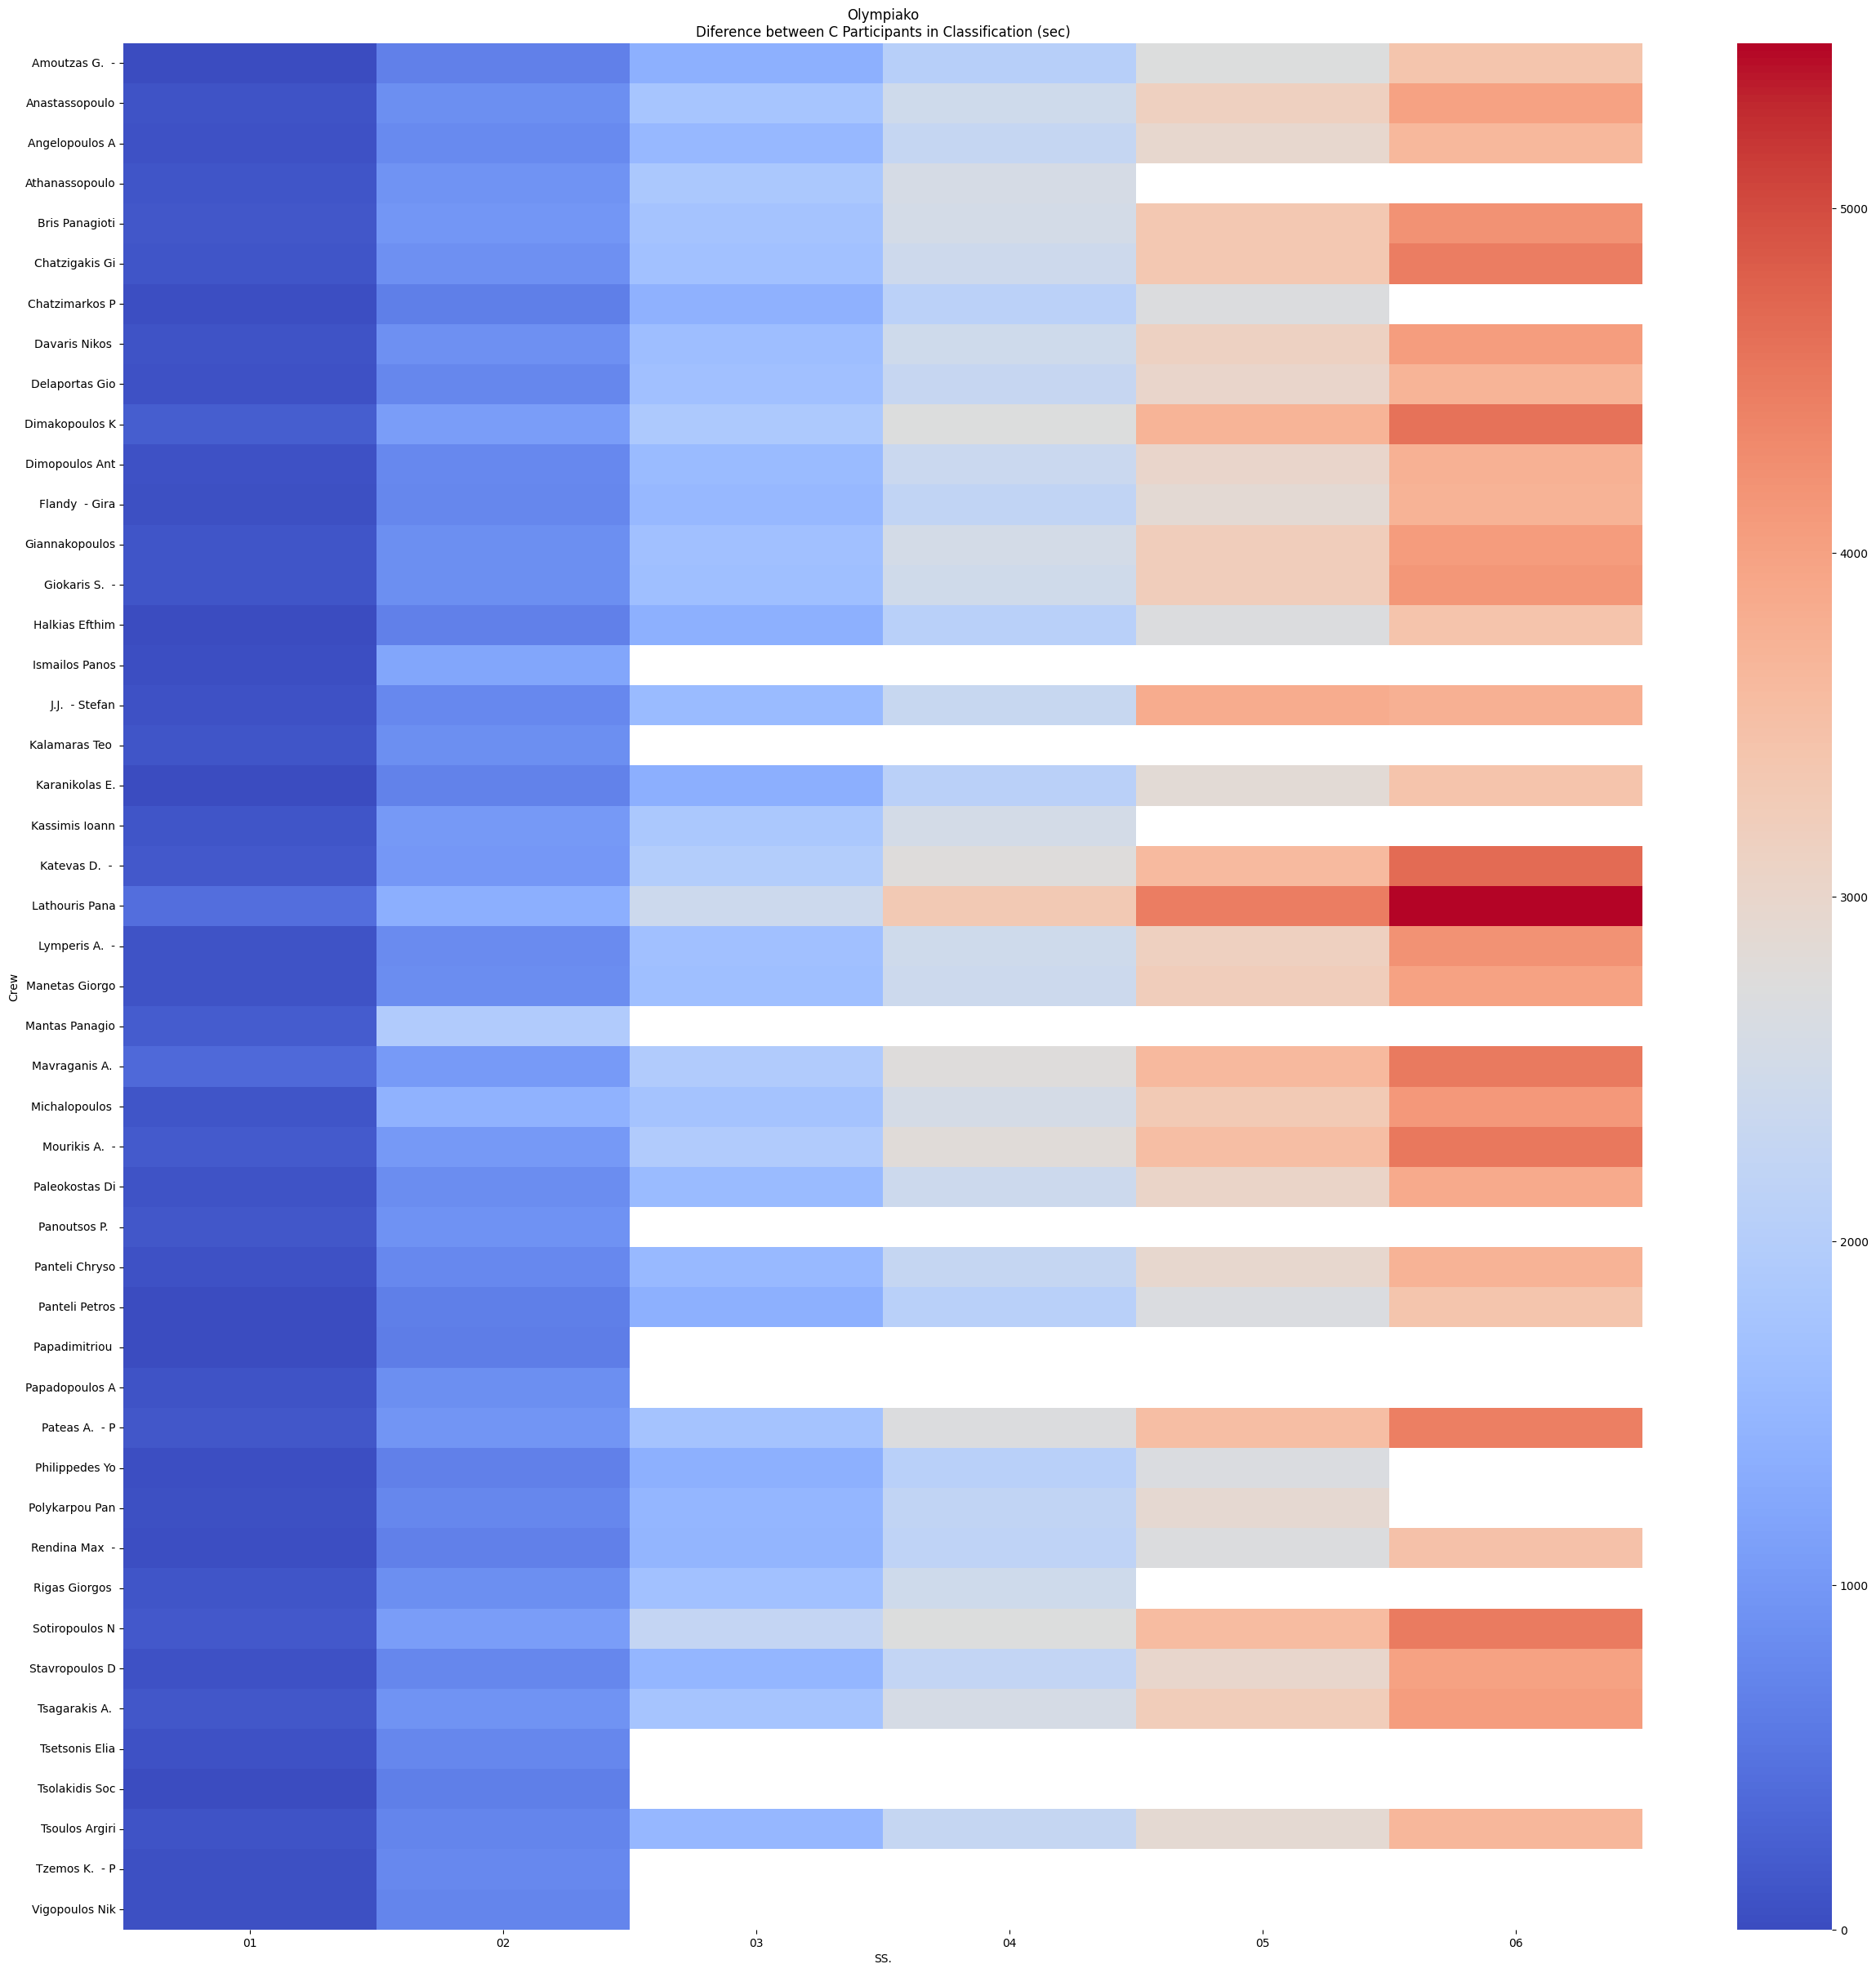

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_overall, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_" + Group + rallyname + ".png")
plt.show()

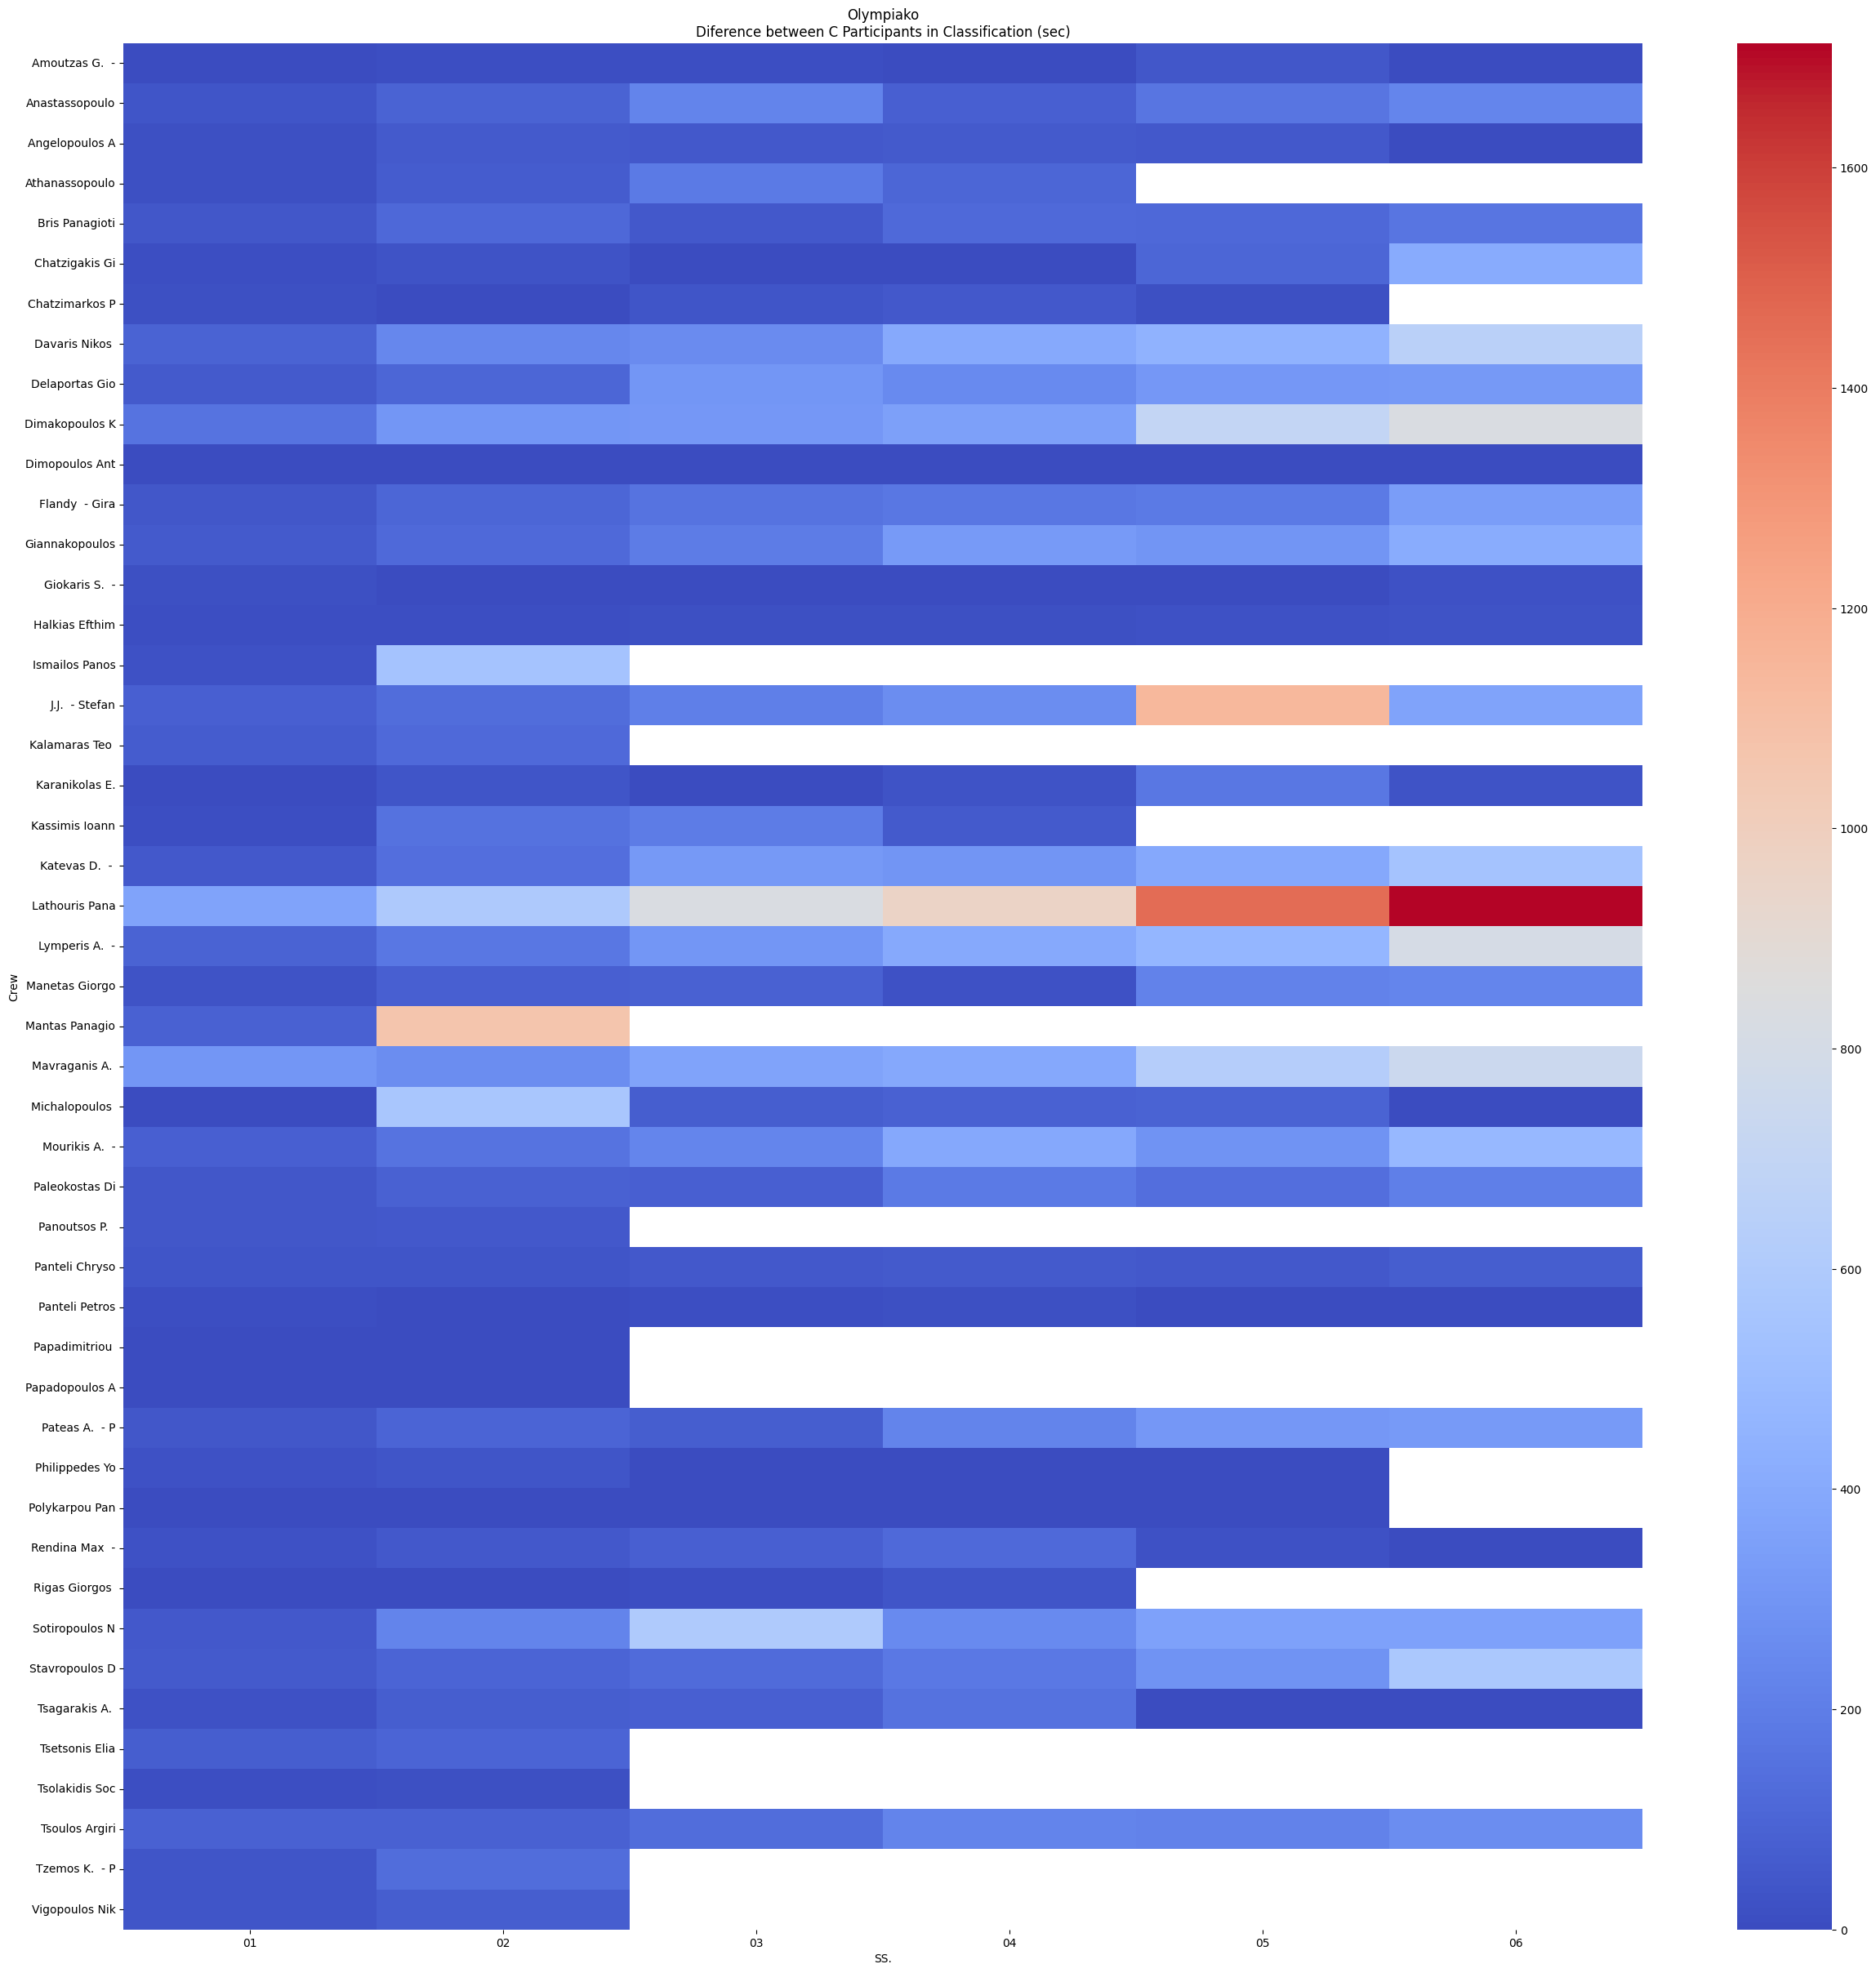

In [28]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_group, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_Group" + Group + rallyname + ".png")
plt.show()